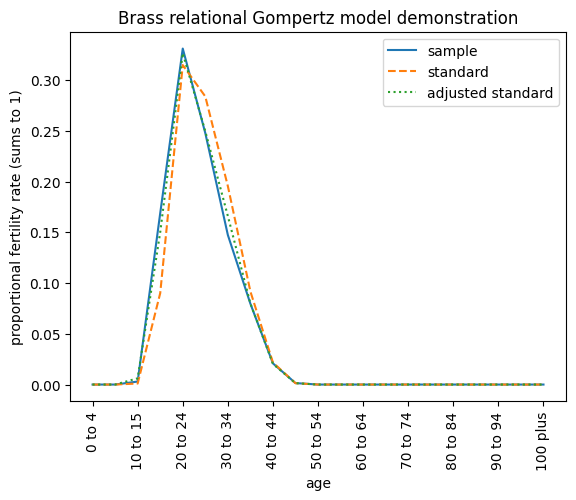

In [1]:
##############################################################################################################################
##PYTHON CODE (notebook, .ipynb file using https://jupyter.org/ for https://www.python.org/) FOR THE BRASS RELATIONAL GOMPERTZ MODEL OF FERTALITY
##FOLLOWING R CODE AVAILABLE VIA: https://applieddemogtoolbox.github.io/#BrassFertility 
##https://raw.githubusercontent.com/AppliedDemogToolbox/Hunsinger_BrassRelationalGompertz/master/BrassRelationalGompertzCode.R
##
##EDDIE HUNSINGER, OCTOBER 2022 (UPDATED NOVEMBER 2022)
##https://edyhsgr.github.io/ 
##edyhsgr@gmail.com
##
##EXAMPLE DATA IS LINKED, SO YOU SHOULD BE ABLE TO RUN IT WITHOUT ANY MODIFICATIONS IN JUPYTER
##
##THERE IS NO WARRANTY FOR THIS CODE
##
##USEFUL PYTHON INFO BY UC DAVIS PROF NORM MATLOFF: https://web.cs.ucdavis.edu/~matloff/matloff/public_html/python.html 
##############################################################################################################################

##Calling libraries aka packages
import pandas as pandas  #typically 'import pandas as pd'; a Python library with data analysis tools including to plot, can install eg with 'pip install pandas'
pandas.options.mode.chained_assignment = None  # default='warn'  #To avoid pandas 'SettingWithCopyWarning'
import numpy as numpy  #typically 'import numpy as np'; a Python library with numerical analysis tools, can install eg with 'pip install numpy'

fx = pandas.read_csv("https://github.com/AppliedDemogToolbox/Hunsinger_BrassRelationalGompertz/raw/master/Fx.csv")

##Function making and using
def gompit(gompitInput):  #Define a function called 'gompit'; indentation defines the end of the function
  with numpy.errstate(divide = 'ignore'):  #To avoid divide-by-zero warning
    gompitOutput = numpy.log(-numpy.log(gompitInput))  #https://papp.iussp.org/sessions/papp103_s03/PAPP103_s03_060_020.html
    return gompitOutput  

def Brass(fx,fxBase,minagegroupfert,maxagegroupfert):  
  cumsumfx = numpy.cumsum(fx[(minagegroupfert-1):maxagegroupfert])
  cumsumfxBase = numpy.cumsum(fxBase[(minagegroupfert-1):maxagegroupfert])
  Yx = gompit(cumsumfx)  #Using gompit() function created above
  YxBase = gompit(cumsumfxBase)
  BetaAlpha = numpy.polyfit(Yx.iloc[(minagegroupfert-1):maxagegroupfert],YxBase.iloc[(minagegroupfert-1):maxagegroupfert],1)  #A first (the reference to 1) degree polynomial is a line; function gives slope then intercept
  Beta = BetaAlpha[0]
  Alpha = BetaAlpha[1]
  return Alpha, Beta

BrassAlphaBeta = Brass(fx['StandardFx'],fx['SampleFx'],2,9)  #Apply the function
#print(BrassAlphaBeta)  #Alpha is [0] and Beta is [1]

YxSample = gompit(numpy.cumsum(fx['SampleFx']))
YxStandard = gompit(numpy.cumsum(fx['StandardFx']))
YxStandardAdjusted = BrassAlphaBeta[1]*YxStandard+BrassAlphaBeta[0]

cumsumfxAdjusted = numpy.exp(-numpy.exp(YxStandardAdjusted))

fxAdjusted = [0]*len(fx)

for i in range(1,len(fxAdjusted)):  #Range from the second value (ie 1 with base 0) to the length of fxAdjusted
  fxAdjusted[i] = cumsumfxAdjusted[i]-cumsumfxAdjusted[i-1]
  fxAdjusted[1] = 0

fx['StandardFxAdjusted'] = fxAdjusted
#print(fx)

agelabels = ["0 to 4","10 to 15","20 to 24","30 to 34",         #For plot; just every other group
             "40 to 44","50 to 54","60 to 64","70 to 74",
             "80 to 84","90 to 94","100 plus"]

fxPlot = fx['SampleFx'].plot(kind = 'line', x = 'x', y = 'fx')  #This object will be used in the next line
fxPlot = fx['StandardFx'].plot(kind = 'line', linestyle = 'dashed', x = 'x', y = 'fx')
fxPlot = fx['StandardFxAdjusted'].plot(kind = 'line', linestyle='dotted', x = 'x', y = 'fx')
fxPlot.set_xlabel('age')
fxPlot.set_xticks(numpy.arange(0,21,2))                         #Just every other group
fxPlot.set_xticklabels(agelabels, rotation = 90)
fxPlot.set_ylabel('proportional fertility rate (sums to 1)')
fxPlot.legend(['sample', 'standard', 'adjusted standard'])
fxPlot = fxPlot.set_title(label = 'Brass relational Gompertz model demonstration')


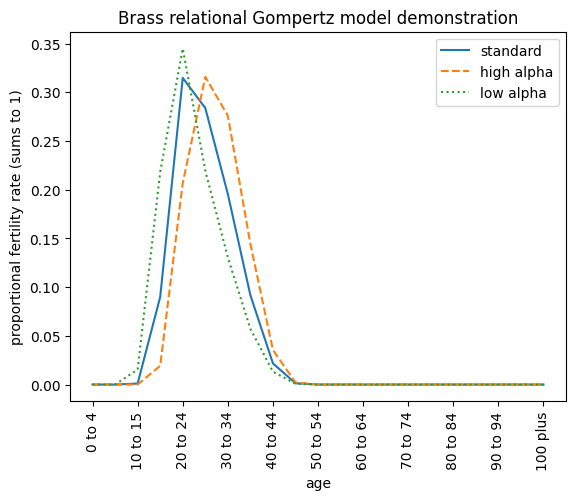

In [2]:
YxStandardHighAlpha = (1)*YxStandard+(.5)
cumsumfxHighAlpha = numpy.exp(-numpy.exp(YxStandardHighAlpha))

fxHighAlpha = [0]*len(fx)

for i in range(1,len(fxHighAlpha)):  
  fxHighAlpha[i] = cumsumfxHighAlpha[i]-cumsumfxHighAlpha[i-1]
  fxHighAlpha[1] = 0

fx['fxHighAlpha'] = fxHighAlpha

YxStandardLowAlpha = (1)*YxStandard+(-.5)
cumsumfxLowAlpha = numpy.exp(-numpy.exp(YxStandardLowAlpha))

fxLowAlpha = [0]*len(fx)

for i in range(1,len(fxLowAlpha)):  
  fxLowAlpha[i] = cumsumfxLowAlpha[i]-cumsumfxLowAlpha[i-1]
  fxLowAlpha[1] = 0

fx['fxLowAlpha'] = fxLowAlpha
#print(fx)

fxPlot = fx['StandardFx'].plot(kind = 'line', x = 'x', y = 'fx')
fxPlot = fx['fxHighAlpha'].plot(kind = 'line', linestyle = 'dashed', x = 'x', y = 'fx')
fxPlot = fx['fxLowAlpha'].plot(kind = 'line', linestyle = 'dotted', x = 'x', y = 'fx')
fxPlot.set_xlabel('age')
fxPlot.set_xticks(numpy.arange(0,21,2))
fxPlot.set_xticklabels(agelabels, rotation = 90)
fxPlot.set_ylabel('proportional fertility rate (sums to 1)')
fxPlot.legend(['standard', 'high alpha', 'low alpha'])
fxPlot = fxPlot.set_title(label = 'Brass relational Gompertz model demonstration')


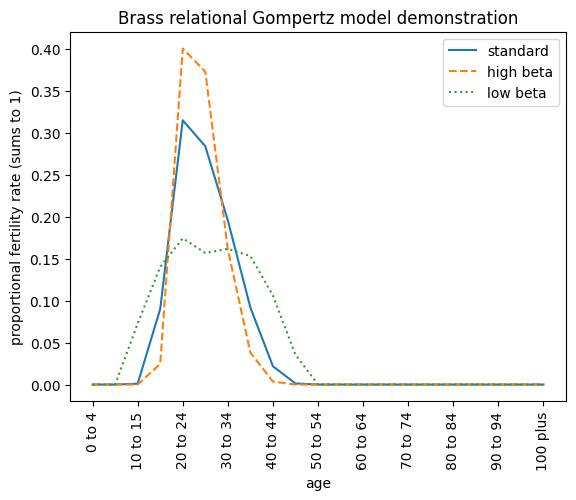

In [3]:
YxStandardHighBeta = (1.5)*YxStandard+(0)
cumsumfxHighBeta = numpy.exp(-numpy.exp(YxStandardHighBeta))

fxHighBeta = [0]*len(fx)

for i in range(1,len(fxHighBeta)):  
  fxHighBeta[i] = cumsumfxHighBeta[i]-cumsumfxHighBeta[i-1]
  fxHighBeta[1] = 0

fx['fxHighBeta'] = fxHighBeta

YxStandardLowBeta = (.5)*YxStandard+(0)
cumsumfxLowBeta = numpy.exp(-numpy.exp(YxStandardLowBeta))

fxLowBeta = [0]*len(fx)

for i in range(1,len(fxLowBeta)):  
  fxLowBeta[i] = cumsumfxLowBeta[i]-cumsumfxLowBeta[i-1]
  fxLowBeta[1] = 0

fx['fxLowBeta'] = fxLowBeta
#print(fx)

fxPlot = fx['StandardFx'].plot(kind = 'line', x = 'x', y = 'fx')
fxPlot = fx['fxHighBeta'].plot(kind = 'line', linestyle = 'dashed', x = 'x', y = 'fx')
fxPlot = fx['fxLowBeta'].plot(kind = 'line', linestyle = 'dotted', x = 'x', y = 'fx')
fxPlot.set_xlabel('age')
fxPlot.set_xticks(numpy.arange(0,21,2))
fxPlot.set_xticklabels(agelabels, rotation = 90)
fxPlot.set_ylabel('proportional fertility rate (sums to 1)')
fxPlot.legend(['standard', 'high beta', 'low beta'])
fxPlot = fxPlot.set_title(label = 'Brass relational Gompertz model demonstration')